## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: CARME VIÑAS
## CLASE 2: EDA + Visualización + Preprocesamiento

En este ejercicio vamos a analizar el **dataset de un seguro médico**, que contiene características de una persona y el precio del seguro que se le aplica. Después de limpiar y preprocesar el dataset, podríamos desarrollar un modelo de ML que predijera el precio del seguro médico de una persona en función de sus características.

Vamos a realizar lo siguiente:

- EDA: Explorar los datos
- Data Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información
- Visualization
- Pre-processing

### IMPORTAMOS LIBRERÍAS Y DATOS

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerías necesarias.

In [6]:
import pandas as pd # Librería para la manipulación y el análisis de datos
import numpy as np # Librería para la manipulación de datos y para la ejecución de operaciones matemáticas
import matplotlib.pyplot as plt # Librería para la visualización de datos
import seaborn as sns # Librería para la visualización de datos
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder # Librería para crear modelos de ML

Leemos el fichero de seguros de donde lo tenemos guardado.

In [7]:
df_seguro = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clase1y2-Preprocessing/Clase 2 - Preprocesamiento/Datasets/dataset_seguros_sin_nulos.csv") # LEEMOS EL FICHERO

In [8]:
df_seguro

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI
...,...,...,...,...,...,...,...,...,...,...
1333,19,FEMENINO,20.600,55,0,VALENCIA,144,ALTO,False,AUDI
1334,52,MASCULINO,38.600,104,2,VALENCIA,860,ALTO,False,TOYOTA
1335,23,FEMENINO,33.400,90,0,VALENCIA,900,MEDIO,False,AUDI
1336,52,FEMENINO,44.700,120,3,VALENCIA,951,MEDIO,False,SEAT


### VISTA INICIAL DEL DF

In [9]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [10]:
df_seguro.columns

Index(['EDAD', 'SEXO', 'IMC', 'PESO', 'HIJOS', 'CIUDAD', 'PRECIO',
       'INGRESO_SALARIAL', 'FUMADOR', 'TIPO_COCHE'],
      dtype='object')

In [11]:
df_seguro.describe() # DESCRIPCIÓN DE LAS VARIABLES NUMÉRICAS

,EDAD,IMC,PESO,HIJOS,PRECIO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.667231,82.444694,1.091928,1105.854260
std,14.049960,6.095439,16.389299,1.206345,1009.161649
min,18.000000,15.960000,43.000000,0.000000,93.000000
25%,27.000000,26.315000,71.000000,0.000000,395.250000
50%,39.000000,30.400000,82.000000,1.000000,781.500000
75%,51.000000,34.693750,93.000000,2.000000,1386.500000
max,64.000000,53.130000,143.000000,5.000000,5314.000000


In [12]:
df_seguro.shape  # (FILAS x COLUMNAS)

(1338, 10)

In [13]:
df_seguro.head(10)

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI
5,34,FEMENINO,31.920,86,1,BARCELONA,3142,MEDIO,True,SIN COCHE
6,63,FEMENINO,23.085,62,0,BARCELONA,1204,ALTO,False,AUDI
7,18,FEMENINO,26.315,71,0,BARCELONA,183,ALTO,False,KIA
8,35,MASCULINO,36.670,99,1,BARCELONA,3315,BAJO,True,SEAT
9,24,FEMENINO,26.600,72,0,BARCELONA,254,BAJO,False,TOYOTA


### DUPLICADOS

In [14]:
df_seguro[df_seguro.duplicated(keep=False)] # VEMOS LOS DUPLICADOS

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE


No hay duplicados. ¡Podemos seguir!

### NULOS

In [15]:
df_seguro.isnull().sum()

EDAD                0
SEXO                0
IMC                 0
PESO                0
HIJOS               0
CIUDAD              0
PRECIO              0
INGRESO_SALARIAL    0
FUMADOR             0
TIPO_COCHE          0
dtype: int64

No hay nulos. ¡Podemos seguir!

### VARIABLES Y VALORES

Vamos a ver los distintos valores de cada variable del dataset.

In [16]:
for i in df_seguro.columns: # Loop en las columnas del df
    print('\n',i,df_seguro[i].unique(),'\n') # Print nombre de la columna y valores únicos de ésta


 EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19] 


 SEXO ['MASCULINO' 'FEMENINO'] 


 IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.

Vamos a ver el número de veces que aparece cada valor de las distintas columnas del df.

In [17]:
for i in df_seguro.columns: # Loop en las columnas del df
    print('\n',i,df_seguro[i].value_counts(),'\n') # Print del número de veces que aparece cada valor distinto de la columna


 EDAD EDAD
18    69
19    68
45    29
52    29
51    29
47    29
48    29
20    29
46    29
50    29
27    28
25    28
26    28
53    28
49    28
22    28
54    28
23    28
21    28
24    28
28    28
43    27
44    27
31    27
42    27
40    27
30    27
41    27
29    27
55    26
33    26
57    26
32    26
56    26
34    26
36    25
59    25
58    25
38    25
35    25
39    25
37    25
61    23
63    23
62    23
60    23
64    22
Name: count, dtype: int64 


 SEXO SEXO
MASCULINO    678
FEMENINO     660
Name: count, dtype: int64 


 IMC IMC
32.300    13
28.310     9
30.495     8
30.875     8
30.800     8
          ..
40.480     1
26.070     1
24.090     1
28.380     1
44.700     1
Name: count, Length: 547, dtype: int64 


 PESO PESO
80     46
75     41
83     35
74     34
78     34
       ..
132     1
46      1
43      1
129     1
123     1
Name: count, Length: 89, dtype: int64 


 HIJOS HIJOS
0    577
1    322
2    239
3    157
4     25
5     18
Name: count, dtype: int64 


 CIUDAD CI

### TIPOS DE VARIABLES: TARGET, CATEGÓRICAS, BOOLEAN Y NUMÉRICAS

Vamos a separar y estudiar las variables en función de qué tipo son.

In [18]:
df_seguro_2 = df_seguro.copy() # Copiamos el dataframe para no sobreescribir nada en el original.

In [19]:
df_seguro_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


Antes que nada, vamos a definir qué es el target. En Machine Learning, el target es el output del modelo, es decir, la variable que queremos predecir con nuestro modelo. En este caso, lo que queremos predecir es el precio del seguro. Por tanto, la variable "PRECIO" será nuestro target.

In [20]:
target = ["PRECIO"] # Definimos el target

Vemos que hay una variable booleana. Las variables booleanas son aquellas que tienen dos valores posibles: True o False (o 0 y 1).

En nuestro dataset vemos que ya hay una variable booleana: "FUMADOR". Sin embargo, hay otra variable que actualmente es categórica (object) y que podría ser booleana: "SEXO".

Antes que nada, nos interesa transformar las variable "FUMADOR" de tipo booleana a entera para que sea más cómoda de analizar posteriormente.

In [21]:
df_seguro_2["FUMADOR_BOOL"] = df_seguro_2["FUMADOR"].astype(int) # Creamos una nueva variable "FUMADOR_BOOL" que será la variable "FUMADOR" transformada a int

In [22]:
del(df_seguro_2["FUMADOR"]) # Eliminamos la variable "FUMADOR"

Ahora vamos a transformar la variable "SEXO" de categórica a booleana, y después a entera. Usamos la función where y creamos una nueva variable "SEXO_BOOL" que tomará valor 0 cuando la variable "SEXO" sea igual a masculino y valor 1 en caso contrario.

In [23]:
df_seguro_2["SEXO_BOOL"] = np.where(df_seguro_2["SEXO"]=="MASCULINO",0,1) # Creamos una nueva variable booleana "SEXO_BOOL" a partir de "SEXO"

In [24]:
df_seguro_2["SEXO_BOOL"].value_counts() # Número de veces en las que aparece cada valor de la variable "SEXO_BOOL"

SEXO_BOOL
0    678
1    660
Name: count, dtype: int64

In [25]:
del(df_seguro_2["SEXO"]) # Eliminamos la variable "SEXO"

Vemos los nuevos tipos de variables.

In [26]:
df_seguro_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   IMC               1338 non-null   float64
 2   PESO              1338 non-null   int64  
 3   HIJOS             1338 non-null   int64  
 4   CIUDAD            1338 non-null   object 
 5   PRECIO            1338 non-null   int64  
 6   INGRESO_SALARIAL  1338 non-null   object 
 7   TIPO_COCHE        1338 non-null   object 
 8   FUMADOR_BOOL      1338 non-null   int64  
 9   SEXO_BOOL         1338 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 104.7+ KB


Otra manera de identificar el tipo de cada variable es usando el atributo de numpy "dtype.kind".

In [27]:
for i in df_seguro_2:
    print(df_seguro_2[i].dtype.kind)

i
f
i
i
O
i
O
O
i
i


Vamos a crear una función que identifique el tipo de cada variable del dataset de entrada.

In [28]:
def obtener_lista_variables(dataset):

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!=2 and (i not in target):
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())==2 and (i not in target):
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

Le pasamos nuestro dataset a la función para que genere las listas de variables numéricas, booleanas y categóricas.

In [29]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_seguro_2)

In [30]:
print("Las variables numéricas son:",lista_numericas)

Las variables numéricas son: ['EDAD', 'IMC', 'PESO', 'HIJOS']


In [31]:
print("Las variables booleanas son:",lista_boolean)

Las variables booleanas son: ['FUMADOR_BOOL', 'SEXO_BOOL']


In [32]:
print("Las variables categóricas son:",lista_categoricas)

Las variables categóricas son: ['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']


In [33]:
print("Las variables target es:",target[0])

Las variables target es: PRECIO


In [34]:
print(len(df_seguro_2.columns), "variables en total")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

10 variables en total
1 variable a predecir
3 variables categóricas
2 variables boolean
4 variables numéricas


### ANÁLISIS DE LAS VARIABLES

Vamos a ver los histogramas de las variables numéricas.

[[<Axes: title={'center': 'EDAD'}>]]
[[<Axes: title={'center': 'IMC'}>]]
[[<Axes: title={'center': 'PESO'}>]]
[[<Axes: title={'center': 'HIJOS'}>]]


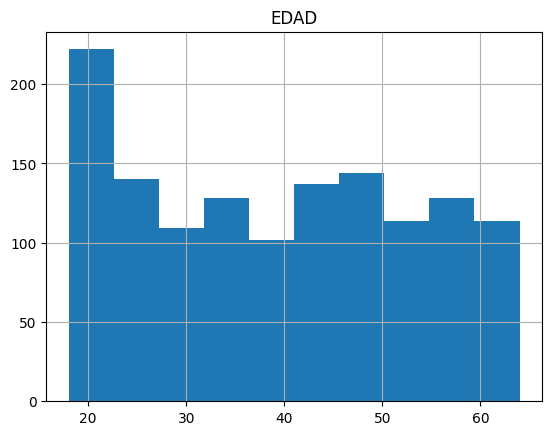

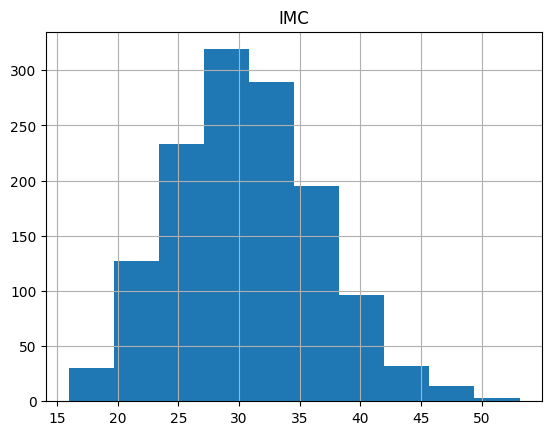

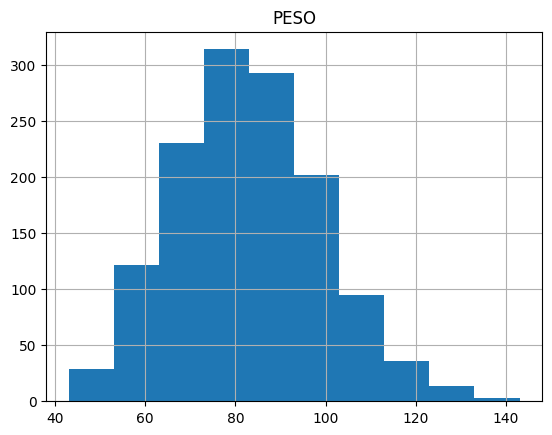

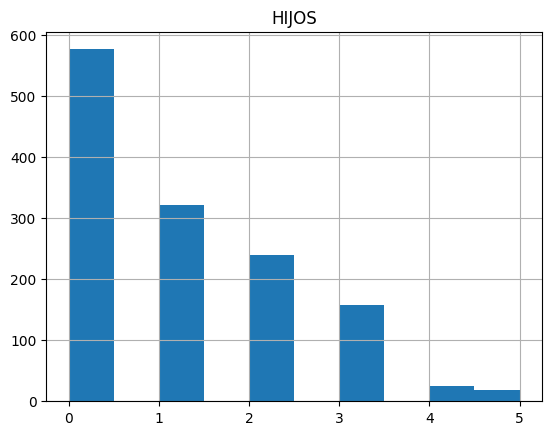

In [35]:
for i in lista_numericas: # Loop en las variables numéricas
  print(df_seguro_2.hist(i))

Para las variables categóricas vamos a ver qué valores tienen.

In [36]:
for i in lista_categoricas:
  print(df_seguro_2.value_counts(i))

CIUDAD
MADRID       364
SEVILLA      325
VALENCIA     325
BARCELONA    324
Name: count, dtype: int64
INGRESO_SALARIAL
MEDIO    540
ALTO     438
BAJO     360
Name: count, dtype: int64
TIPO_COCHE
AUDI         249
SIN COCHE    228
TOYOTA       228
FIAT         213
KIA          210
SEAT         210
Name: count, dtype: int64


### CORRELACIÓN

Decimos que dos (o más) variables están correlacionadas cuando sus valores varían conjuntamente, es decir, que explican lo mismo. Esta correlación puede ser directa (los valores de ambas variables crecen o decrecen a la vez) o inversa (cuando una variable crece, la otra decrece). Cuando hay dos variables muy correlacionadas, conviene eliminar una de ellas.

In [37]:
df_seguro_3 = df_seguro_2.copy() # Creamos una copia del dataset.

In [38]:
corr = df_seguro_3.corr(numeric_only = True) # Usamos la función de pandas "corr" que calcula la correlación entre las variables numéricas
corr.style.background_gradient(cmap='coolwarm') # Con esto obtenemos una tabla que muestra con colores la correlación entre variables

,EDAD,IMC,PESO,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL
EDAD,1.000000,0.107672,0.110553,0.041946,0.299007,-0.025019,0.020581
IMC,0.107672,1.000000,0.997731,0.011162,0.197734,0.003433,-0.048773
PESO,0.110553,0.997731,1.000000,0.013555,0.199860,0.005331,-0.048953
HIJOS,0.041946,0.011162,0.013555,1.000000,0.066241,0.008926,-0.018189
PRECIO,0.299007,0.197734,0.199860,0.066241,1.000000,0.787255,-0.057284
FUMADOR_BOOL,-0.025019,0.003433,0.005331,0.008926,0.787255,1.000000,-0.074670
SEXO_BOOL,0.020581,-0.048773,-0.048953,-0.018189,-0.057284,-0.074670,1.000000


Hay una correlación muy alta entre "FUMADOR_BOOL" y "PRECIO". Como "PRECIO" es el target, esto significa que la variable "FUMADOR_BOOL" va a ser muy explicativa en nuestro modelo.

Por otro lado, observamos también una correlación muy alta entre "IMC" y "PESO". Ambas variables són features del modelo y explican lo mismo, por lo que nos conviene eliminar una de ellas.

In [39]:
del(df_seguro_3["PESO"]) # ELIMINAMOS LA VARIABLE PESO

In [40]:
df_seguro_3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1


### ANÁLISIS DEL TARGET

Vamos a analizar el target. Nos interesa saber cómo se distribuye.

array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

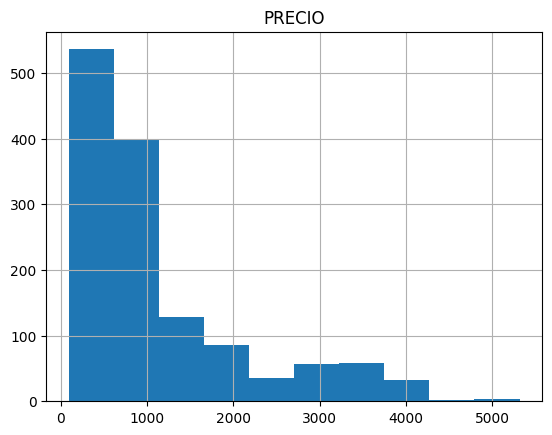

In [41]:
df_seguro_3.hist("PRECIO") # Histograma del target

Un boxplot es un método para representar gráficamente una serie de datos numéricos a través de sus cuartiles. Se muestran a simple vista la mediana y los cuartiles de los datos, y también pueden representarse sus valores atípicos.

Representamos nuestro target en un boxplot usando la librería seaborn.

<Axes: xlabel='PRECIO'>

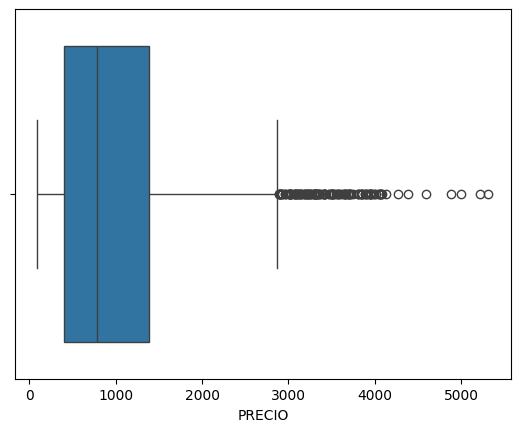

In [42]:
sns.boxplot(x = df_seguro_3["PRECIO"])

El precio está distribuido de manera sesgada ya que se distribuye más hacia un lado, es decir, esta variable está distribuida de manera asimétrica. Conviene normalizar el target para transformarla en una distribución normal. Para ello, usamos la función logarítmica.

In [43]:
df_seguro_3["LOG_PRECIO"] = np.log10(df_seguro_3["PRECIO"]) # Creamos una nueva variable "LOG_PRECIO" que será el logaritmo de "PRECIO"

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

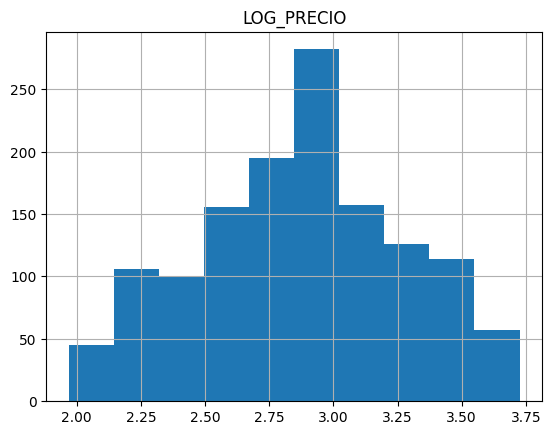

In [44]:
df_seguro_3.hist("LOG_PRECIO") # Histograma de la nueva variable LOG_PRECIO

<Axes: xlabel='LOG_PRECIO'>

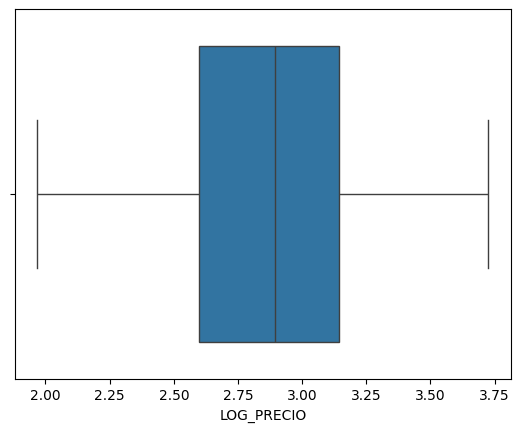

In [45]:
sns.boxplot(x = df_seguro_3["LOG_PRECIO"]) # Boxplot de LOG_PRECIO

### TARGET VS. FEATURES

Vamos a ver la relación entre el target y las diferentes variables predictivas (features) de nuestro dataset. Para ello, representamos gráficamente el comportamentio del target en función de otras variables. Lo podemos hacer de diferentes maneras:

- **Violin plot** (en el caso de variables categóricas o booleanas)

- **Boxplot**

- **Scatter plot**

In [49]:
df_seguro_3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


#### PRECIO VS. SEXO

<ipython-input-47-dc33fa3e9cc1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="SEXO_BOOL",y="PRECIO", data=df_seguro_3, palette="Wistia") # Representamos en un "violin plot" (de la librería seaborn) la relación entre el sexo y el precio


<Axes: xlabel='SEXO_BOOL', ylabel='PRECIO'>

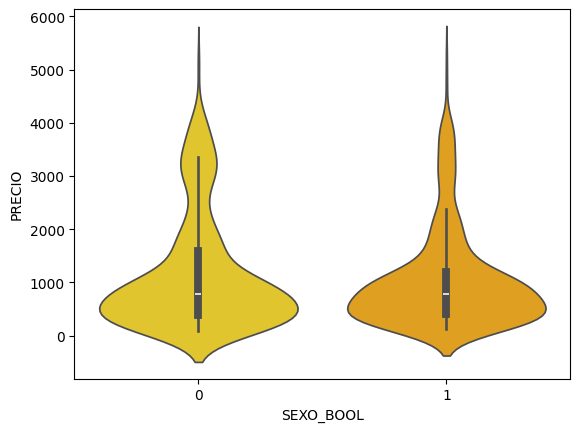

In [47]:
sns.violinplot(x="SEXO_BOOL", y="PRECIO", data=df_seguro_3, palette="Wistia") # Representamos en un "violin plot" (de la librería seaborn) la relación entre el sexo y el precio

Vemos que en ambos casos (0 y 1, o masculino y femenino) el precio se distribuye de la misma manera. -> El sexo no afecta al precio del seguro.

#### PRECIO VS. INGRESO SALARIAL

<ipython-input-64-c844481b905f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="INGRESO_SALARIAL", y="PRECIO", data=df_seguro_3, palette="Wistia") # Representamos en un "violin plot" (de la librería seaborn) la relación entre el salario y el precio


<Axes: xlabel='INGRESO_SALARIAL', ylabel='PRECIO'>

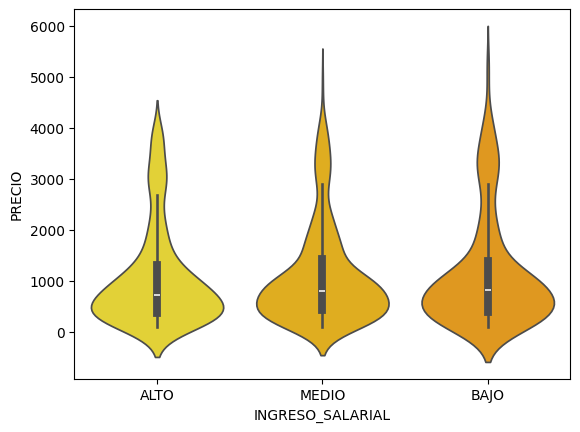

In [64]:
sns.violinplot(x="INGRESO_SALARIAL", y="PRECIO", data=df_seguro_3, palette="Wistia") # Representamos en un "violin plot" (de la librería seaborn) la relación entre el salario y el precio

Vemos que en los tres casos el precio se distribuye de la misma manera. -> El salario no afecta al precio del seguro.

#### PRECIO VS. FUMADOR

<ipython-input-48-9a497abc05c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="FUMADOR_BOOL",y="PRECIO", data=df_seguro_3, palette="magma") # Representamos en un "violin plot" (de la librería seaborn) la relación entre la variable "fumador" y el precio


<Axes: xlabel='FUMADOR_BOOL', ylabel='PRECIO'>

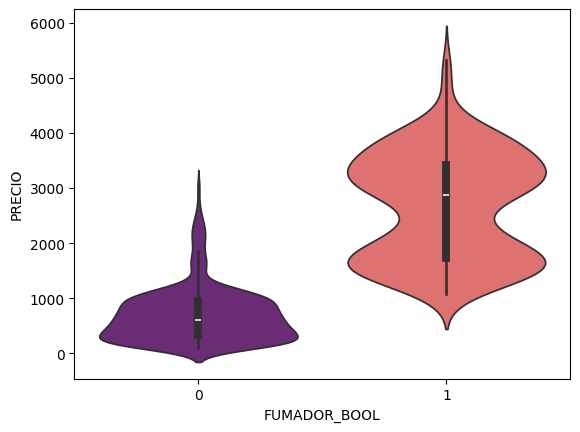

In [48]:
sns.violinplot(x="FUMADOR_BOOL", y="PRECIO", data=df_seguro_3, palette="magma") # Representamos en un "violin plot" (de la librería seaborn) la relación entre la variable "fumador" y el precio

Vemos que en el caso de los clientes fumadores el precio se distribuye en rangos mucho mayores. -> Cuando el cliente es fumador, el precio del seguro es mayor.

#### PRECIO VS. CIUDAD

<ipython-input-52-506010173456>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="CIUDAD", y="PRECIO", data=df_seguro_3, palette="magma") # Representamos en un "violin plot" (de la librería seaborn) la relación entre la ciudad y el precio


<Axes: xlabel='CIUDAD', ylabel='PRECIO'>

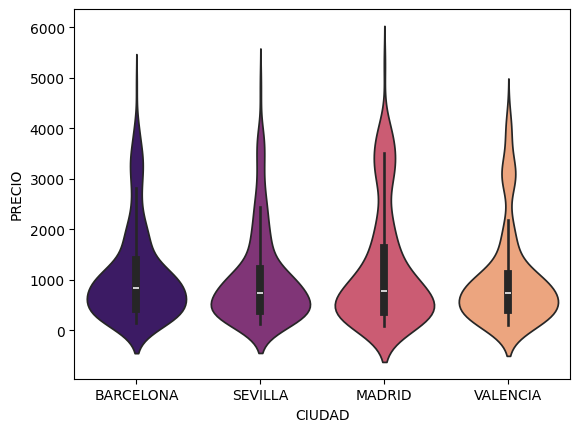

In [52]:
sns.violinplot(x="CIUDAD", y="PRECIO", data=df_seguro_3, palette="magma") # Representamos en un "violin plot" (de la librería seaborn) la relación entre la ciudad y el precio

Vemos que en las 4 ciudades el precio se distribuye de la misma manera. -> La ciudad no afecta al precio del seguro.

#### PRECIO VS. TIPO DE COCHE

<ipython-input-66-a940f50c5f4f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="TIPO_COCHE", y="PRECIO", data=df_seguro_3, palette="magma") # Representamos en un "violin plot" (de la librería seaborn) la relación entre el tipo de coche y el precio


<Axes: xlabel='TIPO_COCHE', ylabel='PRECIO'>

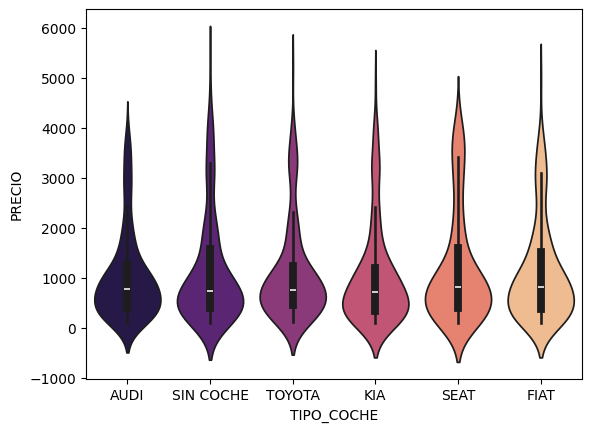

In [66]:
sns.violinplot(x="TIPO_COCHE", y="PRECIO", data=df_seguro_3, palette="magma") # Representamos en un "violin plot" (de la librería seaborn) la relación entre el tipo de coche y el precio

Vemos que el tipo de coche no afecta al precio del seguro.

#### PRECIO VS. HIJOS

<ipython-input-50-823a2c10a221>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HIJOS", y="PRECIO", data=df_seguro_3, palette="coolwarm") # Representamos en un "boxplot" (de la librería seaborn) la relación entre los hijos y el precio


<Axes: xlabel='HIJOS', ylabel='PRECIO'>

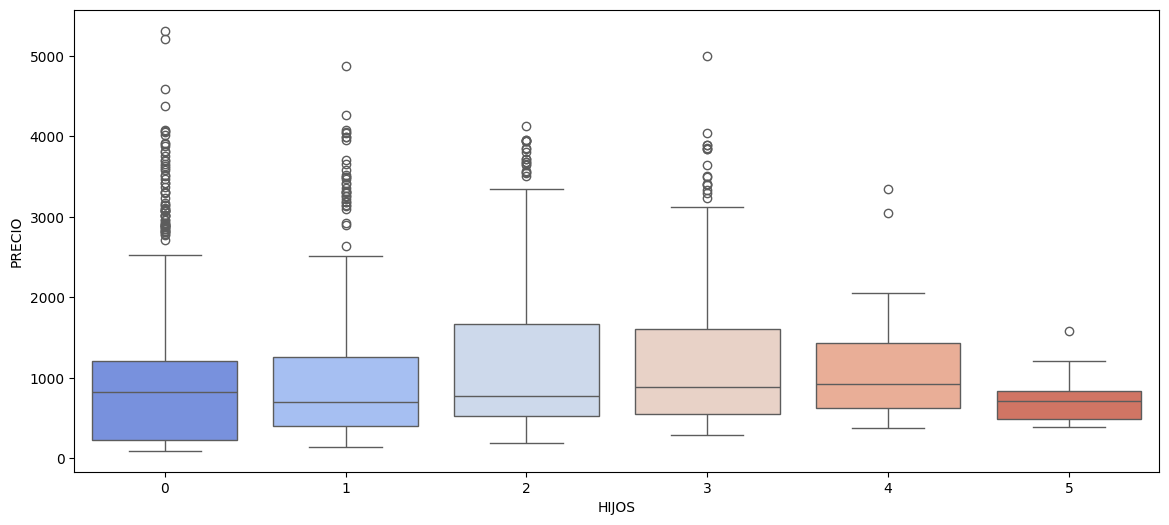

In [50]:
plt.figure(figsize=(14,6)) # Definimos el tamaño de la figura
sns.boxplot(x="HIJOS", y="PRECIO", data=df_seguro_3, palette="coolwarm") # Representamos en un "boxplot" (de la librería seaborn) la relación entre los hijos y el precio

<Axes: xlabel='HIJOS', ylabel='PRECIO'>

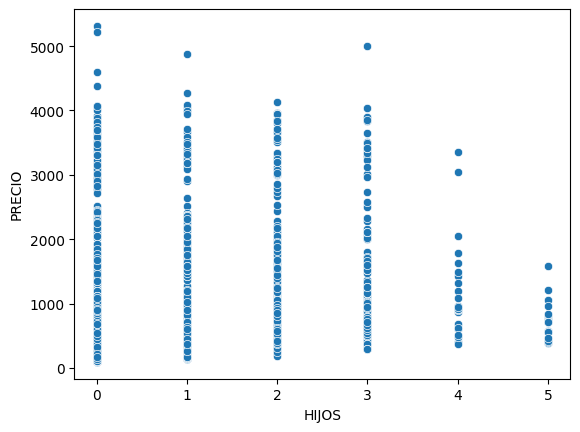

In [51]:
sns.scatterplot(x="HIJOS", y="PRECIO", data=df_seguro_3) # Representamos en un scatter plot (de la librería seaborn) la relación entre los hijos y el precio

Vemos que en el caso de personas con 5 hijos el valor del precio se distribuye en un rango mucho más pequeño que en el resto de casos (puede ser por el hecho de que la muestra sea menor).

Parece que el número de hijos no afecta al precio del seguro.

#### PRECIO VS. EDAD

<Axes: xlabel='EDAD', ylabel='PRECIO'>

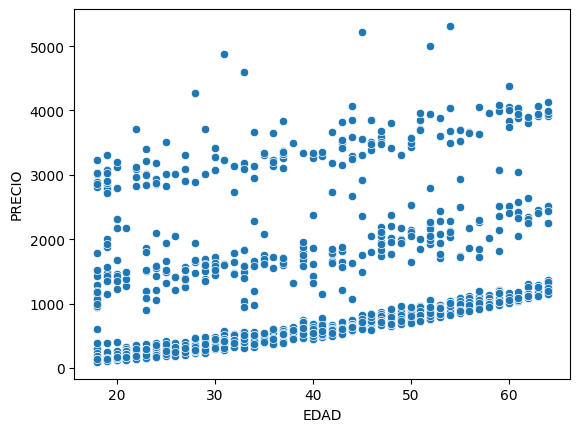

In [53]:
sns.scatterplot(x="EDAD", y="PRECIO", data=df_seguro_3) # Representamos en un scatter plot (de la librería seaborn) la relación entre la edad y el precio

Vemos que el precio del seguro aumenta con la edad.

#### PRECIO VS. IMC

<Axes: xlabel='EDAD', ylabel='IMC'>

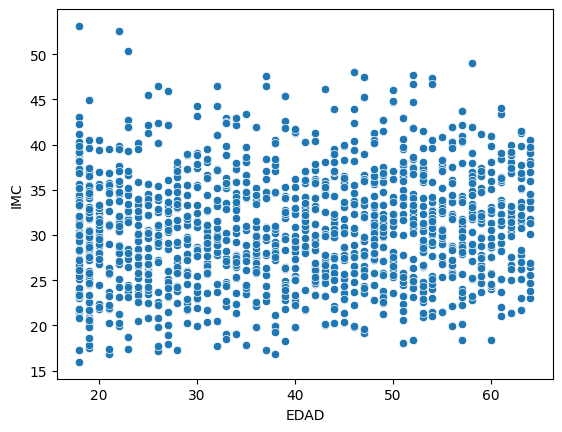

In [65]:
sns.scatterplot(x="EDAD", y="IMC", data=df_seguro_3) # Representamos en un scatter plot (de la librería seaborn) la relación entre el IMC y el precio

Vemos que el IMC no afecta al precio del seguro.

#### PRECIO VS. EDAD VS. FUMADOR

Al scatter plot anterior (precio vs. edad) le podemos añadir una variable booleana ("FUMADOR"), representando en colores distintos los casos en que las personas sea fumadoras o no.

<Axes: xlabel='EDAD', ylabel='PRECIO'>

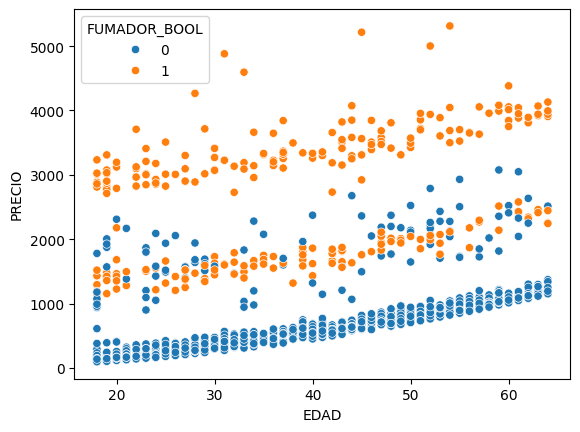

In [54]:
sns.scatterplot(x="EDAD", y="PRECIO", hue="FUMADOR_BOOL", data=df_seguro_3) # Representamos en un scatter plot (de la librería seaborn) la relación entre la edad, el hecho de que una persona fume (usando el parámetro hue) y el precio

### PROCESAMIENTO DE VARIABLES

In [56]:
df_seguro_3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


In [57]:
df_seguro_3.dtypes

EDAD                  int64
IMC                 float64
HIJOS                 int64
CIUDAD               object
PRECIO                int64
INGRESO_SALARIAL     object
TIPO_COCHE           object
FUMADOR_BOOL          int64
SEXO_BOOL             int64
LOG_PRECIO          float64
dtype: object

In [75]:
df_seguro_4=df_seguro_3.copy() # Creamos una copia del dataframe

Para reescalar las variables que nos interesa, vamos a utilizar las siguientes estrategias:

- **Ordinal Encoding**

- **One Hot Encoding**

- **Min Max Scaling**

Antes que nada, definimos de nuevo nuestro target y los distintos tipos de variables.

In [76]:
target = ["PRECIO","LOG_PRECIO"] # Definimos el target

In [77]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_seguro_4) # Obtenemos la lista de los distintos tipos de variables mediante la función

#### VARIABLES CATEGÓRICAS

In [78]:
print("Las variables categóricas son:",lista_categoricas)

Las variables categóricas son: ['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']


In [79]:
  df_seguro_4["INGRESO_SALARIAL"].unique() # Valores únicos de "INGRESO_SALARIAL"

array(['ALTO', 'MEDIO', 'BAJO'], dtype=object)

La variable INGRESO_SALARIAL toma tres valores según si los ingresos son altos, medios o bajos. Al ser una variable que muestra un orden de los ingresos, la podemos transformar a numérica mediante **Ordinal Encoding**, que transformará los valores de la variable en números dándoles un orden según su valor.

In [80]:
oe = OrdinalEncoder(categories=[['BAJO','MEDIO','ALTO']]) # Usamos la función OrdinalEncoder de sklearn para crear categorías ordenadas en BAJO-MEDIO-ALTO
df_seguro_4["INGRESO_SALARIAL_INT"]=oe.fit_transform(df_seguro_4[['INGRESO_SALARIAL']]) # Creamos una nueva variable numérica de ingresos transformando la variable categórica con el OrdinalEncoder definido

In [81]:
df_seguro_4.head(10)

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541,2.0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026,1.0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243,2.0
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030,0.0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182,1.0
5,34,31.920,1,BARCELONA,3142,MEDIO,SIN COCHE,1,1,3.497206,1.0
6,63,23.085,0,BARCELONA,1204,ALTO,AUDI,0,1,3.080626,2.0
7,18,26.315,0,BARCELONA,183,ALTO,KIA,0,1,2.262451,2.0
8,35,36.670,1,BARCELONA,3315,BAJO,SEAT,1,0,3.520484,0.0
9,24,26.600,0,BARCELONA,254,BAJO,TOYOTA,0,1,2.404834,0.0


In [82]:
del(df_seguro_4["INGRESO_SALARIAL"]) # Eliminamos la variable categórica INGRESO_SALARIAL del dataset
lista_categoricas.remove("INGRESO_SALARIAL") # Eliminamos la variable categórica INGRESO_SALARIAL de la lista de variables categóricas

In [83]:
df_seguro_4.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT
0,37,29.830,2,BARCELONA,534,AUDI,0,0,2.727541,2.0
1,25,26.220,0,BARCELONA,227,AUDI,0,0,2.356026,1.0
2,52,30.780,1,BARCELONA,900,SIN COCHE,0,1,2.954243,2.0
3,23,23.845,0,BARCELONA,200,TOYOTA,0,0,2.301030,0.0
4,60,36.005,0,BARCELONA,1102,AUDI,0,1,3.042182,1.0


Con las otras dos variables categóricas (CIUDAD y TIPO_COCHE) no tendría sentido usar el Ordinal Encoding, puesto que no son variables que indiquen un orden o en las que algunos valores se puedan representar de manera numérica. Lo que podemos hacer es aplicar **One Hot Encoding**, que se basa en transformar las diferentes categorías de la variable en variables independientes que tomen valores True y False (o 0 y 1). Para esto, podemos usar la función get_dummies de pandas.

In [93]:
df_seguro_5 = pd.get_dummies(data=df_seguro_4, columns=lista_categoricas, dtype=int) # Transformamos las variables categóricas mediante OHE usando get_dummies

In [94]:
df_seguro_5.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,37,29.830,2,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,25,26.220,0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,52,30.780,1,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,23,23.845,0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,60,36.005,0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


In [95]:
df_seguro_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  1338 non-null   int64  
 1   IMC                   1338 non-null   float64
 2   HIJOS                 1338 non-null   int64  
 3   PRECIO                1338 non-null   int64  
 4   FUMADOR_BOOL          1338 non-null   int64  
 5   SEXO_BOOL             1338 non-null   int64  
 6   LOG_PRECIO            1338 non-null   float64
 7   INGRESO_SALARIAL_INT  1338 non-null   float64
 8   CIUDAD_BARCELONA      1338 non-null   int64  
 9   CIUDAD_MADRID         1338 non-null   int64  
 10  CIUDAD_SEVILLA        1338 non-null   int64  
 11  CIUDAD_VALENCIA       1338 non-null   int64  
 12  TIPO_COCHE_AUDI       1338 non-null   int64  
 13  TIPO_COCHE_FIAT       1338 non-null   int64  
 14  TIPO_COCHE_KIA        1338 non-null   int64  
 15  TIPO_COCHE_SEAT      

#### VARIABLES NUMÉRICAS

In [102]:
print("Las variables numéricas son:",lista_numericas)

Las variables numéricas son: ['EDAD', 'IMC', 'HIJOS']


In [103]:
df_seguro_6= df_seguro_5.copy()

El algoritmo **MinMaxScaler** sirve para escalar cada variable numérica individualmente de manera que los valores de la variable se encuentren en el rango entre 0 y 1.

In [104]:
MinMax = MinMaxScaler() # Definimos la función de sklearn que vamos a usar

In [105]:
df_seguro_6[lista_numericas] = MinMax.fit_transform(df_seguro_6[lista_numericas]) # Transformamos las variables numéricas del dataset con MinMaxScaler

In [106]:
df_seguro_6.head(10)

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,0.373150,0.4,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,0.152174,0.276029,0.0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,0.739130,0.398709,0.2,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,0.108696,0.212133,0.0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,0.913043,0.539279,0.0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0
5,0.347826,0.429379,0.2,3142,1,1,3.497206,1.0,1,0,0,0,0,0,0,0,1,0
6,0.978261,0.191687,0.0,1204,0,1,3.080626,2.0,1,0,0,0,1,0,0,0,0,0
7,0.000000,0.278585,0.0,183,0,1,2.262451,2.0,1,0,0,0,0,0,1,0,0,0
8,0.369565,0.557170,0.2,3315,1,0,3.520484,0.0,1,0,0,0,0,0,0,1,0,0
9,0.130435,0.286252,0.0,254,0,1,2.404834,0.0,1,0,0,0,0,0,0,0,0,1


### GUARDAMOS EL RESULTADO

Cuando hemos limpiado y preprocesado los datos, necesitamos guardar el dataset final en un fichero pickle para después crear el modelo de ML a partir de este.

In [107]:
pd.to_pickle(df_seguro_6,"/content/drive/MyDrive/Colab Notebooks/Clase1y2-Preprocessing/Clase 2 - Preprocesamiento/Datasets/df_seguro_final_PK") # Guardamos el dataset en un pickle

In [108]:
df_recuperacion = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Clase1y2-Preprocessing/Clase 2 - Preprocesamiento/Datasets/df_seguro_final_PK") # Leemos de nuevo el dataset

In [109]:
df_recuperacion

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,0.373150,0.4,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,0.152174,0.276029,0.0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,0.739130,0.398709,0.2,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,0.108696,0.212133,0.0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,0.913043,0.539279,0.0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.021739,0.124832,0.0,144,0,1,2.158362,2.0,0,0,0,1,1,0,0,0,0,0
1334,0.739130,0.609093,0.4,860,0,0,2.934498,2.0,0,0,0,1,0,0,0,0,0,1
1335,0.108696,0.469196,0.0,900,0,1,2.954243,1.0,0,0,0,1,1,0,0,0,0,0
1336,0.739130,0.773204,0.6,951,0,1,2.978181,1.0,0,0,0,1,0,0,0,1,0,0
